# K-Nearest Neighbors (K-NN) - Car Prediction Lab

### import libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### install mlxtend - used for confustion matrix report

In [17]:
#Anaconda does not install this by default, so need installation of mlxtend
%pip install mlxtend  


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load the file for processing and display first 10 records

In [7]:
df = pd.read_csv(r'data\Car amount prediction1.csv')
df.head(10)

,id,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,842302,M,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,842517,M,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,84300903,F,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,84348301,F,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,84358402,F,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,843786,F,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,844359,F,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,84458202,F,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,844981,M,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,84501001,F,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


### Remove Id and Annual Salary feature from the dataFrame and move the Gender Target field to the end

In [8]:
D = df[['Age', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount', 'Gender']]
D

,Age,Credit Card Debt,Net Worth,Car Purchase Amount,Gender
0,41.851720,11609.380910,238961.2505,35321.45877,M
1,40.870623,9572.957136,530973.9078,45115.52566,M
2,43.152897,11160.355060,638467.1773,42925.70921,F
3,58.271369,14426.164850,548599.0524,67422.36313,F
4,57.313749,5358.712177,560304.0671,55915.46248,F
...,...,...,...,...,...
495,41.462515,6995.902524,541670.1016,48901.44342,M
496,37.642000,12301.456790,360419.0988,31491.41457,F
497,53.943497,10611.606860,764531.3203,64147.28888,F
498,59.160509,14013.034510,337826.6382,45442.15353,F


### Display information to verify if any null values are there and to check the DataType

In [9]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  500 non-null    float64
 1   Credit Card Debt     500 non-null    float64
 2   Net Worth            500 non-null    float64
 3   Car Purchase Amount  500 non-null    float64
 4   Gender               500 non-null    object 
dtypes: float64(4), object(1)
memory usage: 19.7+ KB


### Use Pair Plot to show relation between different numercial fields, Fields use for this scatter plots are
#### 1. Age  2. Credit Card Debt 3. Net Worth 4. Car Purchase Amount
#### The histogram for each column shows how the bin distribution is for diffrent fields, example
        1. Age field shows the high range of people are in the age group 40-50
        2. The car purchase amount is more in the range of 37-47 thousand
       
#### The scatter plot shows 
        1. There is a positive corelation between Age and Car Purchase Amount
        2. Net worth and Car Purchase Amount
        3. For the rest it shows it is scattered all around, which means no corelation.

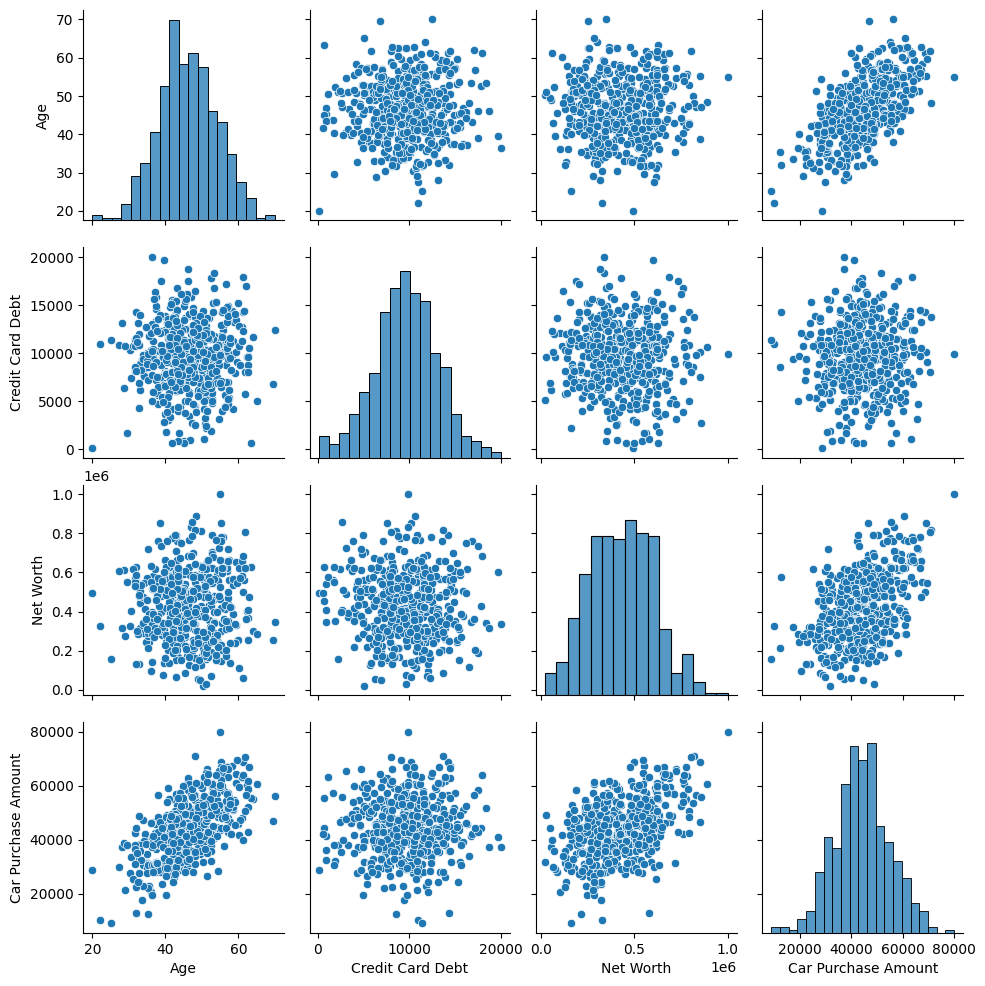

In [10]:
sns.pairplot(D[['Age', 'Credit Card Debt', 'Net Worth','Car Purchase Amount']])
plt.show()

### Seperate the Feature (IV) and Target (DV) into different variable for running the model

In [11]:
import sys
np.set_printoptions(suppress=True,threshold=sys.maxsize)
X = D.iloc[:, :-1]
y = D.iloc[:, -1]

### Apply Min Max Scaller on Feature column, this will scale all the field between 0 and 1 which will allow machine learning model not be bias based on higher value of some fields.

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # fit and transform data
#X_scaled

### Split the dataset between training and test set in 80:20 ratio

In [13]:
X_scaled_train,X_scaled_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0) 
#random_state of 0, the performance can be improved if we give 42, but the disadvantage will be, it will give different value when the 
#kernal is restarted.

print ('X_Train Shape :', X_scaled_train.shape)
print ('y_Train Shape :' ,y_train.shape)
print ('X_Test Shape  :', X_scaled_test.shape)
print ('y_Test Shape  :', y_test.shape)

X_Train Shape : (400, 4)
y_Train Shape : (400,)
X_Test Shape  : (100, 4)
y_Test Shape  : (100,)


### Run the KNN classfier with differnt Number of Neighbors (K), We are using manhattan distance as the metric with defualt value of P=2
#### Based on the iteration, following observation has been found, it was found when 101 iteration was run we found the accuracy touched close to 59% when the K-value is 3 and it was also good when when it was 15
#### As the K-Value was increased the model was going bad to worse.

#### Another observation is, KNN overall was not giving more then 61% on the training set for the above value and the Test accuracy was not going more then 59%
    

Text(0, 0.5, 'Testing Accuracy')

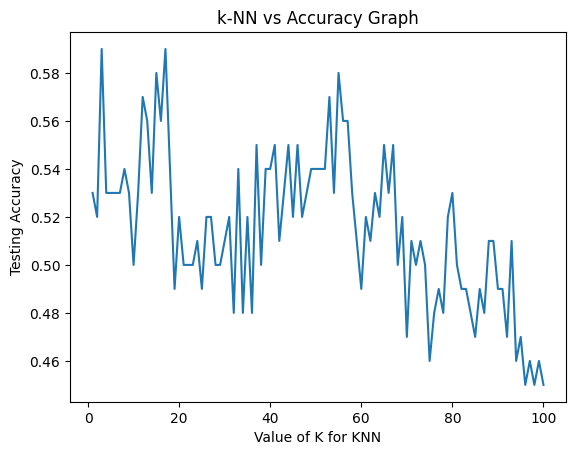

In [14]:
k_range = range(1, 101)
scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors =k, metric = 'manhattan')
    classifier.fit(X_scaled_train, y_train)
    y_pred = classifier.predict(X_scaled_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.title('k-NN vs Accuracy Graph')
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Run the Model with a given kNN value to see how it scored and display the Accuracy Report, Confusion Matrix and Classfication Report for that given K value

### Change the K value to see how the model performs for that value, we can use the above graph to shortlist a number and view the report for that.

Accuracy Score
Score on Training Set ----- Score on Test Set
61.25                 -----    58.0







Confusion Matrix Table


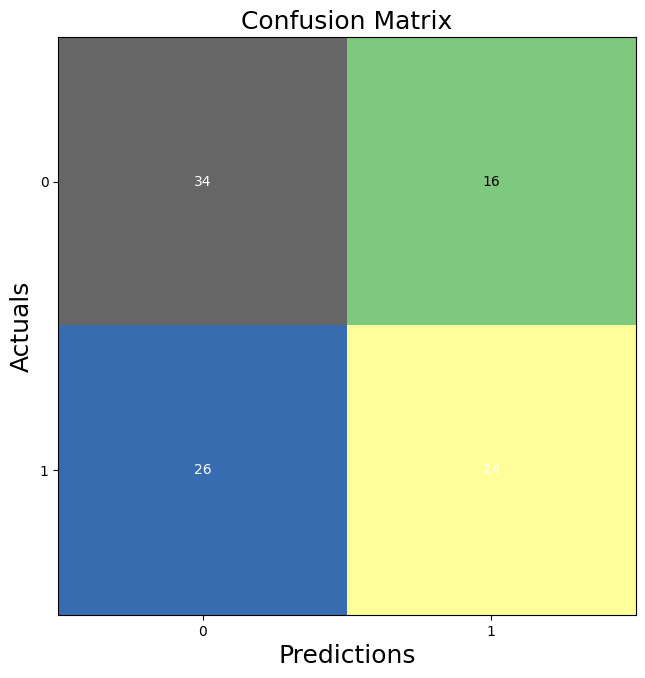




Classification Report
              precision    recall  f1-score   support

           F       0.57      0.68      0.62        50
           M       0.60      0.48      0.53        50

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



In [16]:
k = 15 # Change this number to view different performance of the model
classifier = KNeighborsClassifier(n_neighbors =k, metric = 'manhattan')
classifier.fit(X_scaled_train, y_train)
y_pred = classifier.predict(X_scaled_test)
scores.append(accuracy_score(y_test, y_pred))

#test the score and generate output to view
classifier_score = round(classifier.score(X_scaled_train, y_train) * 100, 2)
classifier_score_test = round(classifier.score(X_scaled_test, y_test) * 100, 2)
print("===============================================")
print('Accuracy Score')
print("===============================================")
print(f"Score on Training Set ----- Score on Test Set")
print(f"{classifier_score}                 -----    {classifier_score_test}")
print('\n\n\n\n\n\n')


#Show confusion matrix to view the TP,TN,FP,FN
print('==========================================')
print('Confusion Matrix Table')
print('==========================================')
conf_matrix = confusion_matrix(y_test,y_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(7.5, 7.5), cmap=plt.cm.Accent)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Print the classfication report to see the overall performance of the classfier
print('\n\n\n==========================================')
print('Classification Report')
print('==========================================')
print(classification_report(y_test,y_pred))


In [32]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))